In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [2]:
class ScriptData:
    def __init__(self, api_key):
        self.api_key = api_key
        self.intraday_data = {}

    def fetch_intraday_data(self, script):
        url = f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={script}&interval=1min&apikey={self.api_key}"
        response = requests.get(url)
        if response.status_code == 200:
            self.intraday_data[script] = response.json()
        else:
            raise Exception("Could not fetch intraday data for the script")

    def convert_intraday_data(self, script):
        if script in self.intraday_data:
            data = self.intraday_data[script]["Time Series (1min)"]
            df = pd.DataFrame(columns=["timestamp", "open", "high", "low", "close", "volume"])
            for timestamp, values in data.items():
                df = df.append({
                    "timestamp": pd.Timestamp(timestamp),
                    "open": float(values["1. open"]),
                    "high": float(values["2. high"]),
                    "low": float(values["3. low"]),
                    "close": float(values["4. close"]),
                    "volume": int(values["5. volume"])
                }, ignore_index=True)
            self.intraday_data[script] = df
        else:
            raise Exception(f"No intraday data found for the script: {script}")

    def __getitem__(self, script):
        if script in self.intraday_data:
            return self.intraday_data[script]
        else:
            raise KeyError(f"No intraday data found for the script: {script}")

    def __setitem__(self, script, data):
        self.intraday_data[script] = data

    def __contains__(self, script):
        return script in self.intraday_data

In [3]:
api_val = 'DSAYRHIL65BMMO6E'

In [4]:
script_data = ScriptData(api_val)
script_data.fetch_intraday_data('GOOGL')
script_data.convert_intraday_data('GOOGL')
script_data['GOOGL']

,timestamp,open,high,low,close,volume
0,2023-02-15 20:00:00,97.10,97.11,97.10,97.10,1470
1,2023-02-15 19:59:00,97.12,97.12,97.12,97.12,684
2,2023-02-15 19:58:00,97.12,97.12,97.12,97.12,1298
3,2023-02-15 19:57:00,97.10,97.12,97.10,97.12,1047
4,2023-02-15 19:56:00,97.12,97.12,97.10,97.10,806
...,...,...,...,...,...,...
95,2023-02-15 18:01:00,96.90,96.95,96.89,96.94,6472
96,2023-02-15 18:00:00,96.90,96.90,96.90,96.90,585
97,2023-02-15 17:59:00,96.90,96.91,96.90,96.91,760
98,2023-02-15 17:58:00,96.93,96.93,96.93,96.93,122


In [5]:
script_data.fetch_intraday_data('AAPL')
script_data.convert_intraday_data('AAPL')
script_data['AAPL']

,timestamp,open,high,low,close,volume
0,2023-02-15 20:00:00,155.51,155.5100,155.48,155.4800,7147
1,2023-02-15 19:59:00,155.50,155.5100,155.49,155.5100,3725
2,2023-02-15 19:58:00,155.48,155.5000,155.48,155.4901,1386
3,2023-02-15 19:57:00,155.49,155.5000,155.49,155.4900,1288
4,2023-02-15 19:56:00,155.48,155.4800,155.48,155.4800,690
...,...,...,...,...,...,...
95,2023-02-15 17:12:00,155.29,155.2900,155.29,155.2900,120
96,2023-02-15 17:10:00,155.29,155.2900,155.29,155.2900,359
97,2023-02-15 17:08:00,155.29,155.2900,155.29,155.2900,275
98,2023-02-15 17:07:00,155.30,155.3085,155.30,155.3085,283


In [6]:
'GOOGL' in script_data, 'AAPL' in script_data, 'NVDA' in script_data

(True, True, False)

In [7]:
def indicator1(df, timeperiod=5):
    if 'timestamp' not in df.columns:
        raise ValueError("Dataframe doesn't contain timestamp column")
    # creating a new dataframe with 'timestamp' and 'indicator' columns
    result = pd.DataFrame(columns=['timestamp', 'indicator'])
    result['timestamp'] = df['timestamp']
    result['indicator'] = df['close'].rolling(window=timeperiod).mean()
    return result

In [8]:
indicator1(script_data['GOOGL'], 5)

,timestamp,indicator
0,2023-02-15 20:00:00,NaN
1,2023-02-15 19:59:00,NaN
2,2023-02-15 19:58:00,NaN
3,2023-02-15 19:57:00,NaN
4,2023-02-15 19:56:00,97.112
...,...,...
95,2023-02-15 18:01:00,96.954
96,2023-02-15 18:00:00,96.940
97,2023-02-15 17:59:00,96.930
98,2023-02-15 17:58:00,96.928


In [9]:
indicator1(script_data['AAPL'], 5)

,timestamp,indicator
0,2023-02-15 20:00:00,NaN
1,2023-02-15 19:59:00,NaN
2,2023-02-15 19:58:00,NaN
3,2023-02-15 19:57:00,NaN
4,2023-02-15 19:56:00,155.49002
...,...,...
95,2023-02-15 17:12:00,155.27200
96,2023-02-15 17:10:00,155.28000
97,2023-02-15 17:08:00,155.28800
98,2023-02-15 17:07:00,155.29370


In [10]:
class Strategy:
    
    def __init__(self, script_name):

        script_data = ScriptData(api_val)
        script_data.fetch_intraday_data(script_name)
        script_data.convert_intraday_data(script_name)
        self.df = script_data[script_name]
        
        self.indicator_data = indicator1(self.df, 2)
        self.signals = self.generate_signals()
        
    
    def generate_signals(self):
        signals = pd.DataFrame({'timestamp': self.df['timestamp']})
        signals['signal'] = 'NO_SIGNAL'
        for i in range(1, len(self.df)):
            if self.indicator_data['indicator'][i] > self.df['close'][i]:
                if self.indicator_data['indicator'][i-1] < self.df['close'][i-1]:
                    signals.loc[i, 'signal'] = 'BUY'
            elif self.indicator_data['indicator'][i] < self.df['close'][i]:
                if self.indicator_data['indicator'][i-1] > self.df['close'][i-1]:
                    signals.loc[i, 'signal'] = 'SELL'
        buy_sell_df = signals[signals['signal'].isin(['BUY', 'SELL'])][['timestamp', 'signal']]
        return buy_sell_df

    def plot_signals(self):
      fig, ax = plt.subplots(figsize=(35, 12))

      # plotting close data and indicator data
      ax.plot(self.df['timestamp'], self.df['close'], color='r', label='Close')
      ax.plot(self.indicator_data['timestamp'], self.indicator_data['indicator'], color='grey', label='Indicator')

      # plotting signals as arrows
      signal_values = {'BUY': 1, 'SELL': -1, 'NO_SIGNAL': 0}
      signal_colors = {'BUY': '#E75480', 'SELL': 'blue', 'NO_SIGNAL': 'yellow'}
      signals = self.signals['signal'].map(signal_values).values
      signal_timestamps = self.signals['timestamp'].values
      signal_offsets = signals * 0.025
      for timestamp, offset, signal in zip(signal_timestamps, signal_offsets, signals):
          if signal != 0:
              ax.annotate("", xy=(timestamp, self.df['close'][self.df['timestamp'] == timestamp].values[0]), 
                        xytext=(timestamp, self.df['close'][self.df['timestamp'] == timestamp].values[0] + offset),
                        arrowprops=dict(facecolor=signal_colors[self.signals[self.signals['timestamp'] == timestamp]['signal'].values[0]],shrink=0.05))
              

      # setting the axis labels
      ax.set_xlabel('Timestamp')
      ax.set_ylabel('Close')

      # setting x-axis tick format
      ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y %H:%M'))

      # Setting the x-tick labels in minutes
      locator = mdates.MinuteLocator(interval=20)
      ax.xaxis.set_major_locator(locator)

      ax.legend()
      ax.set_facecolor('#ADD8E6') 
      ax.grid()

      # displaying the plot
      plt.show()


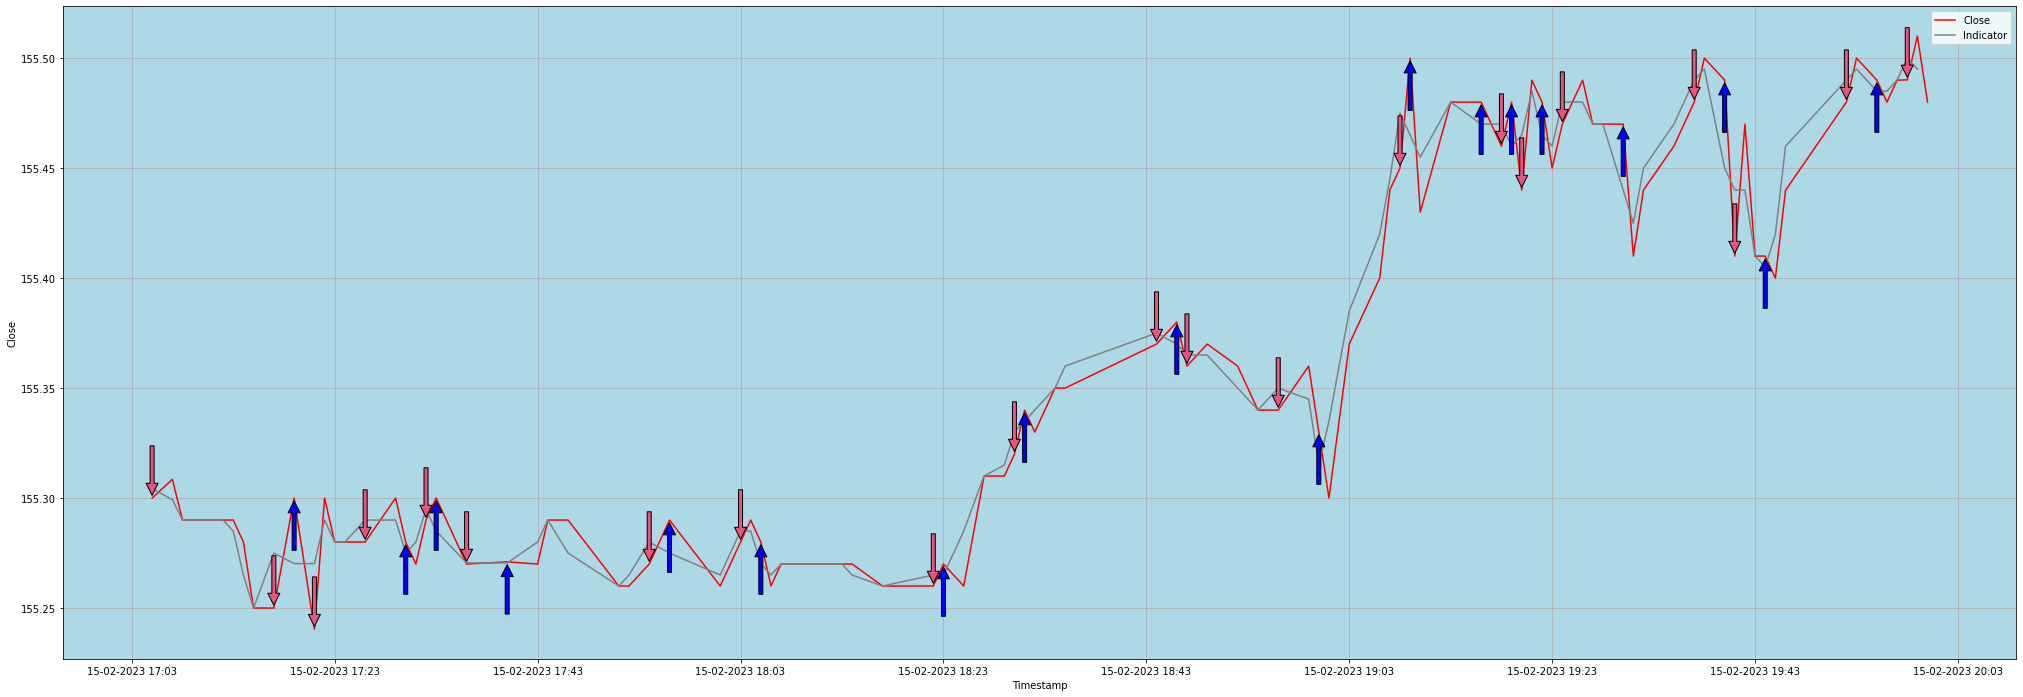

,timestamp,signal
2,2023-02-15 19:58:00,BUY
5,2023-02-15 19:55:00,SELL
7,2023-02-15 19:52:00,BUY
10,2023-02-15 19:44:00,SELL
13,2023-02-15 19:41:00,BUY
14,2023-02-15 19:40:00,SELL
16,2023-02-15 19:37:00,BUY
20,2023-02-15 19:30:00,SELL
24,2023-02-15 19:24:00,BUY
26,2023-02-15 19:22:00,SELL


In [11]:
my_strategy = Strategy('AAPL')
my_strategy.plot_signals()
my_strategy.generate_signals()

